In [1]:
#import dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Import Data
chi = pd.read_csv("ChicagoRealEstate.csv")
cpi = pd.read_excel("Resources/CPI.xlsx")
mp = pd.read_excel("Resources/Median Sale Price.xlsx")
po = pd.read_excel("Resources/Population.xlsx")

cpi['Month'] = pd.DatetimeIndex(cpi['Date']).month
cpi['Year'] = pd.DatetimeIndex(cpi['Date']).year
cpi = cpi[["Year", "Month", "CPI"]]
mp['Month'] = pd.DatetimeIndex(mp['Date']).month
mp['Year'] = pd.DatetimeIndex(mp['Date']).year
mp = mp[["Year", "Month", "Median Sales Price"]]
po['Year'] = pd.DatetimeIndex(po['Date']).year
po['Month'] = pd.DatetimeIndex(po['Date']).month
po = po[["Year", "Month", "Population"]]

df1 = chi.merge(cpi, how="inner", on=['Year', 'Month'])
dfmonthly = df1.merge(po, how="inner", on=["Year", 'Month'])
dfmonthly

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
0,0,1990,1,69.355887,76.897,5.4,7.6,9.8950,128.100,248743
1,1,1990,2,68.700554,77.053,5.3,7.2,10.1975,129.200,248920
2,2,1990,3,68.904077,77.200,5.2,7.0,10.2680,129.500,249146
3,3,1990,4,69.475721,77.277,5.4,7.4,10.3700,130.400,249436
4,4,1990,5,69.995388,77.297,5.4,7.0,10.4775,130.400,249707
5,5,1990,6,70.250853,77.257,5.2,7.3,10.1640,131.700,249990
6,6,1990,7,70.662210,77.139,5.5,7.4,10.0350,132.000,250285
7,7,1990,8,70.579854,77.007,5.7,7.5,10.1000,133.200,250595
8,8,1990,9,70.944463,76.849,5.9,7.5,10.1750,133.800,250904
9,9,1990,10,70.717546,76.701,5.9,6.9,10.1775,133.300,251201


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


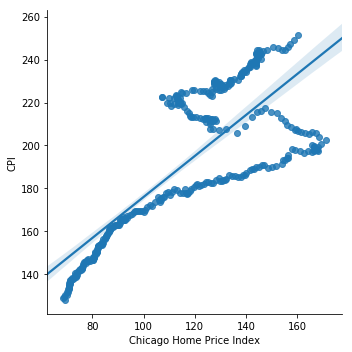

In [3]:
sns.lmplot(x="Chicago Home Price Index", y="CPI", data=dfmonthly);
plt.savefig('images\CHPIvsCPI_monthly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


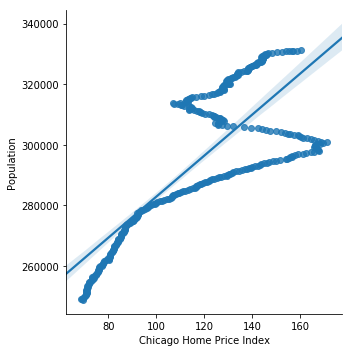

In [4]:
sns.lmplot(x="Chicago Home Price Index", y="Population", data=dfmonthly);
plt.savefig('images\CHPIvsPopulation_monthly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


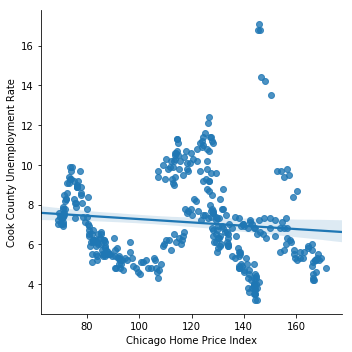

In [5]:
sns.lmplot(x="Chicago Home Price Index", y="Cook County Unemployment Rate", data=dfmonthly);
plt.savefig('images\CHPIvsCookCounty_monthly.png')

In [6]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

dfmonthly.corr(method=histogram_intersection)

KeyError: <function histogram_intersection at 0x12ebcf400>

In [7]:
dfmonthly.corr(method='pearson')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
Unnamed: 0,1.000000,0.999492,0.010354,0.774164,0.929060,0.045359,0.078641,-0.944691,0.995408,0.996540
Year,0.999492,1.000000,-0.021520,0.773711,0.928780,0.045534,0.081820,-0.944087,0.994951,0.995924
Month,0.010354,-0.021520,1.000000,0.009882,0.003619,-0.005730,-0.100161,-0.013691,0.008782,0.013784
Chicago Home Price Index,0.774164,0.773711,0.009882,1.000000,0.914892,-0.145789,-0.106509,-0.687960,0.795402,0.795801
National Home Price Index,0.929060,0.928780,0.003619,0.914892,1.000000,-0.074177,-0.022523,-0.832606,0.926198,0.923171
National Unemployment Rate,0.045359,0.045534,-0.005730,-0.145789,-0.074177,1.000000,0.945789,-0.188562,0.063591,0.049238
Cook County Unemployment Rate,0.078641,0.081820,-0.100161,-0.106509,-0.022523,0.945789,1.000000,-0.220208,0.092135,0.077076
Mortgage Interest Rate,-0.944691,-0.944087,-0.013691,-0.687960,-0.832606,-0.188562,-0.220208,1.000000,-0.942545,-0.947142
CPI,0.995408,0.994951,0.008782,0.795402,0.926198,0.063591,0.092135,-0.942545,1.000000,0.997728
Population,0.996540,0.995924,0.013784,0.795801,0.923171,0.049238,0.077076,-0.947142,0.997728,1.000000


In [8]:
dfmonthly.corr(method='kendall')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
Unnamed: 0,1.000000,0.985339,0.015683,0.659319,0.815830,-0.115971,-0.060353,-0.785939,0.974938,1.000000
Year,0.985339,1.000000,-0.014896,0.652171,0.810636,-0.110555,-0.049740,-0.790636,0.972094,0.985339
Month,0.015683,-0.014896,1.000000,0.012014,0.009440,0.003842,-0.080774,-0.007398,0.007532,0.015683
Chicago Home Price Index,0.659319,0.652171,0.012014,1.000000,0.816255,-0.218441,-0.178231,-0.470253,0.651581,0.659319
National Home Price Index,0.815830,0.810636,0.009440,0.816255,1.000000,-0.251633,-0.197315,-0.624706,0.807244,0.815830
National Unemployment Rate,-0.115971,-0.110555,0.003842,-0.218441,-0.251633,1.000000,0.817725,-0.058736,-0.113629,-0.115971
Cook County Unemployment Rate,-0.060353,-0.049740,-0.080774,-0.178231,-0.197315,0.817725,1.000000,-0.092902,-0.059165,-0.060353
Mortgage Interest Rate,-0.785939,-0.790636,-0.007398,-0.470253,-0.624706,-0.058736,-0.092902,1.000000,-0.770394,-0.785939
CPI,0.974938,0.972094,0.007532,0.651581,0.807244,-0.113629,-0.059165,-0.770394,1.000000,0.974938
Population,1.000000,0.985339,0.015683,0.659319,0.815830,-0.115971,-0.060353,-0.785939,0.974938,1.000000


In [9]:
dfmonthly.corr(method='spearman')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population
Unnamed: 0,1.000000,0.999499,0.010303,0.763957,0.923437,-0.092271,-0.037163,-0.941974,0.998247,1.000000
Year,0.999499,1.000000,-0.021134,0.763383,0.923017,-0.092732,-0.033971,-0.941542,0.997845,0.999499
Month,0.010303,-0.021134,1.000000,0.011962,0.006590,0.006179,-0.113334,-0.007454,0.007269,0.010303
Chicago Home Price Index,0.763957,0.763383,0.011962,1.000000,0.931022,-0.282929,-0.236132,-0.671303,0.767611,0.763957
National Home Price Index,0.923437,0.923017,0.006590,0.931022,1.000000,-0.284952,-0.229694,-0.822804,0.923842,0.923437
National Unemployment Rate,-0.092271,-0.092732,0.006179,-0.282929,-0.284952,1.000000,0.946855,-0.088221,-0.097623,-0.092271
Cook County Unemployment Rate,-0.037163,-0.033971,-0.113334,-0.236132,-0.229694,0.946855,1.000000,-0.146084,-0.042478,-0.037163
Mortgage Interest Rate,-0.941974,-0.941542,-0.007454,-0.671303,-0.822804,-0.088221,-0.146084,1.000000,-0.936948,-0.941974
CPI,0.998247,0.997845,0.007269,0.767611,0.923842,-0.097623,-0.042478,-0.936948,1.000000,0.998247
Population,1.000000,0.999499,0.010303,0.763957,0.923437,-0.092271,-0.037163,-0.941974,0.998247,1.000000


In [10]:
fo = pd.read_excel("Resources/Financial Obligation.xlsx")
ds = pd.read_excel("Resources/Debt Service.xlsx")

fo['Month'] = pd.DatetimeIndex(fo['Date']).month
fo['Year'] = pd.DatetimeIndex(fo['Date']).year
fo = fo[["Year", "Month", "Financial Obligation %"]]

ds['Month'] = pd.DatetimeIndex(ds['Date']).month
ds['Year'] = pd.DatetimeIndex(ds['Date']).year
ds = ds[["Year", "Month", "Debt Service %"]]

dfq = dfmonthly.merge(fo, how="inner", on=["Year", 'Month'])
dfquarterly = dfq.merge(ds, how="inner", on=["Year", "Month"])

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


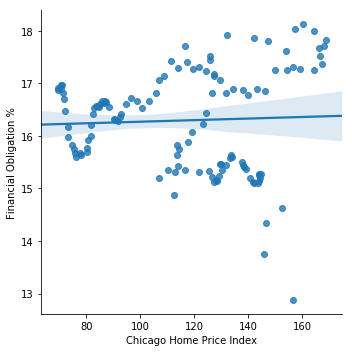

In [11]:
sns.lmplot(x="Chicago Home Price Index", y="Financial Obligation %", data=dfquarterly);
plt.savefig('images\CHPIvsFinancialObligation%_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


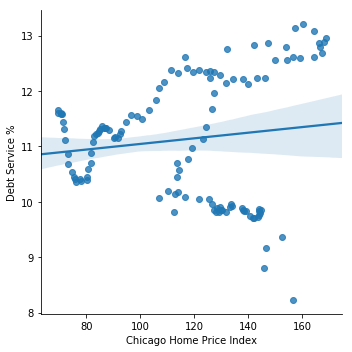

In [12]:
sns.lmplot(x="Chicago Home Price Index", y="Debt Service %", data=dfquarterly);
plt.savefig('images\CHPIvsDebtService%_quarterly.png')

In [13]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

dfquarterly.corr(method=histogram_intersection)

KeyError: <function histogram_intersection at 0x12e6076a8>

In [14]:
dfquarterly.corr(method='pearson')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.999517,0.012256,0.772872,0.928951,0.071273,0.092555,-0.943603,0.995379,0.996637,-0.481856,-0.443519
Year,0.999517,1.000000,-0.018824,0.772463,0.928667,0.071399,0.095441,-0.943275,0.994644,0.996075,-0.482674,-0.443977
Month,0.012256,-0.018824,1.000000,0.010621,0.006108,-0.004267,-0.093166,-0.007440,0.020386,0.014815,0.027892,0.016195
Chicago Home Price Index,0.772872,0.772463,0.010621,1.000000,0.915833,-0.123183,-0.100898,-0.685578,0.794195,0.794928,0.044644,0.129980
National Home Price Index,0.928951,0.928667,0.006108,0.915833,1.000000,-0.041996,-0.012265,-0.830501,0.926078,0.923995,-0.305520,-0.244354
National Unemployment Rate,0.071273,0.071399,-0.004267,-0.123183,-0.041996,1.000000,0.958630,-0.203787,0.083769,0.071898,-0.225404,-0.182094
Cook County Unemployment Rate,0.092555,0.095441,-0.093166,-0.100898,-0.012265,0.958630,1.000000,-0.230212,0.100717,0.090055,-0.265030,-0.209080
Mortgage Interest Rate,-0.943603,-0.943275,-0.007440,-0.685578,-0.830501,-0.203787,-0.230212,1.000000,-0.941326,-0.946283,0.528142,0.476725
CPI,0.995379,0.994644,0.020386,0.794195,0.926078,0.083769,0.100717,-0.941326,1.000000,0.997853,-0.429630,-0.387272
Population,0.996637,0.996075,0.014815,0.794928,0.923995,0.071898,0.090055,-0.946283,0.997853,1.000000,-0.429841,-0.387871


In [15]:
dfquarterly.corr(method='kendall')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.987927,0.013801,0.660903,0.816516,-0.110805,-0.057396,-0.783742,0.977933,1.000000,-0.259871,-0.260387
Year,0.987927,1.000000,-0.013970,0.654090,0.812127,-0.105173,-0.047977,-0.788095,0.970551,0.987927,-0.263047,-0.263830
Month,0.013801,-0.013970,1.000000,0.011724,0.009943,0.002246,-0.081694,-0.004897,0.017959,0.013801,0.009646,0.000742
Chicago Home Price Index,0.660903,0.654090,0.011724,1.000000,0.816000,-0.216010,-0.180240,-0.469935,0.655310,0.660903,0.021419,0.041032
National Home Price Index,0.816516,0.812127,0.009943,0.816000,1.000000,-0.247780,-0.194264,-0.625032,0.809395,0.816516,-0.124387,-0.107871
National Unemployment Rate,-0.110805,-0.105173,0.002246,-0.216010,-0.247780,1.000000,0.823039,-0.061066,-0.110038,-0.110805,-0.077732,-0.064452
Cook County Unemployment Rate,-0.057396,-0.047977,-0.081694,-0.180240,-0.194264,0.823039,1.000000,-0.096093,-0.061040,-0.057396,-0.071421,-0.063370
Mortgage Interest Rate,-0.783742,-0.788095,-0.004897,-0.469935,-0.625032,-0.061066,-0.096093,1.000000,-0.768615,-0.783742,0.326452,0.310452
CPI,0.977933,0.970551,0.017959,0.655310,0.809395,-0.110038,-0.061040,-0.768615,1.000000,0.977933,-0.261453,-0.255775
Population,1.000000,0.987927,0.013801,0.660903,0.816516,-0.110805,-0.057396,-0.783742,0.977933,1.000000,-0.259871,-0.260387


In [16]:
dfquarterly.corr(method='spearman')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.999524,0.012197,0.764184,0.923238,-0.087230,-0.028802,-0.940178,0.998141,1.000000,-0.478089,-0.461137
Year,0.999524,1.000000,-0.018451,0.763657,0.922805,-0.087576,-0.025891,-0.939870,0.997387,0.999524,-0.478108,-0.460895
Month,0.012197,-0.018451,1.000000,0.013183,0.009636,0.003081,-0.107240,-0.005752,0.021122,0.012197,0.011673,0.003630
Chicago Home Price Index,0.764184,0.763657,0.013183,1.000000,0.930636,-0.279956,-0.235983,-0.669358,0.768211,0.764184,0.056160,0.086316
National Home Price Index,0.923238,0.922805,0.009636,0.930636,1.000000,-0.279000,-0.223225,-0.820793,0.923573,0.923238,-0.242058,-0.228240
National Unemployment Rate,-0.087230,-0.087576,0.003081,-0.279956,-0.279000,1.000000,0.950008,-0.090439,-0.093923,-0.087230,-0.105794,-0.080226
Cook County Unemployment Rate,-0.028802,-0.025891,-0.107240,-0.235983,-0.223225,0.950008,1.000000,-0.154475,-0.037654,-0.028802,-0.110747,-0.085015
Mortgage Interest Rate,-0.940178,-0.939870,-0.005752,-0.669358,-0.820793,-0.090439,-0.154475,1.000000,-0.934313,-0.940178,0.519441,0.491963
CPI,0.998141,0.997387,0.021122,0.768211,0.923573,-0.093923,-0.037654,-0.934313,1.000000,0.998141,-0.476490,-0.456388
Population,1.000000,0.999524,0.012197,0.764184,0.923238,-0.087230,-0.028802,-0.940178,0.998141,1.000000,-0.478089,-0.461137


In [17]:
dfmonthly08 = dfmonthly.merge(mp, how="inner", on=["Year", 'Month'])
dfmonthly08

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
0,219,2008,4,153.931433,168.338,5.0,5.6,5.9175,212.662,303926,250583
1,220,2008,5,152.008448,166.659,5.4,6.4,6.0360,214.932,304157,251833
2,221,2008,6,149.959806,165.019,5.6,7.3,6.3200,215.738,304396,255167
3,222,2008,7,147.545839,163.570,5.8,7.3,6.4260,217.459,304646,258667
4,223,2008,8,145.938778,161.991,6.1,7.2,6.4775,215.971,304903,260667
5,224,2008,9,144.213892,160.311,6.1,6.8,6.0375,215.465,305158,256833
6,225,2008,10,142.347410,158.329,6.5,7.1,6.2000,213.363,305403,249500
7,226,2008,11,139.526618,156.142,6.8,7.0,6.0875,209.053,305620,240167
8,227,2008,12,136.711394,153.618,7.3,7.4,5.2860,205.959,305827,234333
9,228,2009,1,132.182815,151.504,7.8,8.8,5.0475,207.616,306035,229167


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


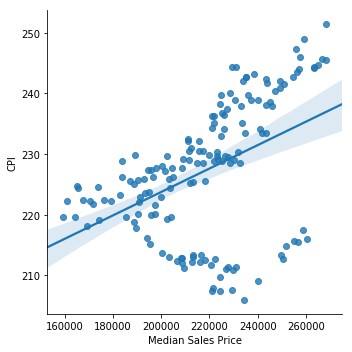

In [18]:
sns.lmplot(x="Median Sales Price", y="CPI", data=dfmonthly08);
plt.savefig('images\MSPvsCPI_monthly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


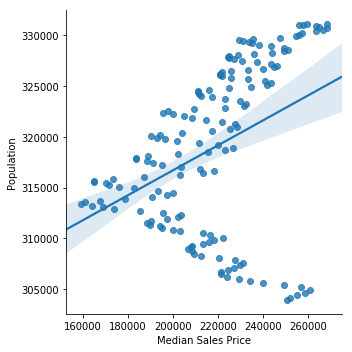

In [19]:
sns.lmplot(x="Median Sales Price", y="Population", data=dfmonthly08);
plt.savefig('images\MSPvsPopulation_monthly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


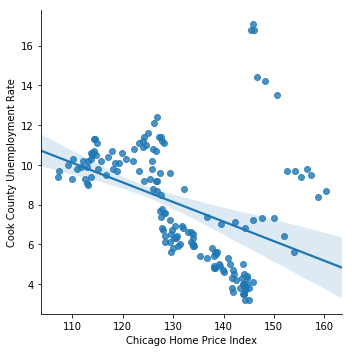

In [20]:
sns.lmplot(x="Chicago Home Price Index", y="Cook County Unemployment Rate", data=dfmonthly08);
plt.savefig('images\CHPIvsCookCountyUR_monthly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


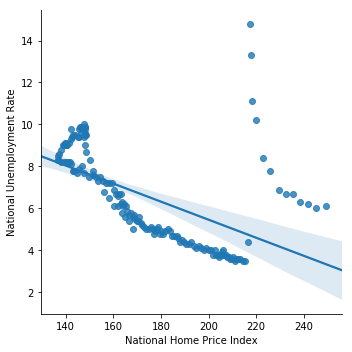

In [21]:
sns.lmplot(x="National Home Price Index", y="National Unemployment Rate", data=dfmonthly08);
plt.savefig('images\CHPIvsCookCountyUR_monthly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


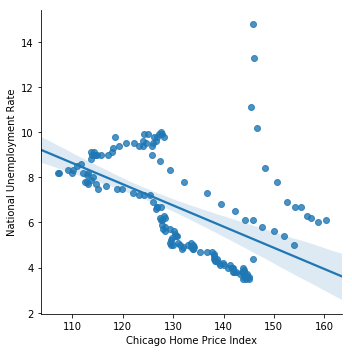

In [22]:
sns.lmplot(x="Chicago Home Price Index", y="National Unemployment Rate", data=dfmonthly08);
plt.savefig('images\CHPIvsNationalUR_monthly.png')

In [23]:
dfmonthly08.corr(method='pearson')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
Unnamed: 0,1.000000,0.997129,-0.018022,0.632592,0.909188,-0.564031,-0.419574,-0.693455,0.977669,0.997778,0.429349
Year,0.997129,1.000000,-0.093676,0.630069,0.906927,-0.560653,-0.412362,-0.691145,0.976214,0.994557,0.416875
Month,-0.018022,-0.093676,1.000000,-0.002067,-0.020989,-0.013070,-0.071767,0.008289,-0.035478,-0.013274,0.140700
Chicago Home Price Index,0.632592,0.630069,-0.002067,1.000000,0.887548,-0.519349,-0.419550,-0.064470,0.646107,0.599170,0.874790
National Home Price Index,0.909188,0.906927,-0.020989,0.887548,1.000000,-0.550915,-0.413570,-0.454964,0.905974,0.886071,0.717399
National Unemployment Rate,-0.564031,-0.560653,-0.013070,-0.519349,-0.550915,1.000000,0.952399,0.123964,-0.571017,-0.579988,-0.281778
Cook County Unemployment Rate,-0.419574,-0.412362,-0.071767,-0.419550,-0.413570,0.952399,1.000000,-0.027806,-0.413053,-0.438186,-0.212411
Mortgage Interest Rate,-0.693455,-0.691145,0.008289,-0.064470,-0.454964,0.123964,-0.027806,1.000000,-0.654794,-0.702457,0.060723
CPI,0.977669,0.976214,-0.035478,0.646107,0.905974,-0.571017,-0.413053,-0.654794,1.000000,0.970048,0.449069
Population,0.997778,0.994557,-0.013274,0.599170,0.886071,-0.579988,-0.438186,-0.702457,0.970048,1.000000,0.390385


In [24]:
dfmonthly08.corr(method='spearman')


,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
Unnamed: 0,1.000000,0.997235,-0.018366,0.654451,0.883313,-0.650080,-0.552209,-0.640175,0.979568,1.000000,0.442856
Year,0.997235,1.000000,-0.091224,0.654562,0.882370,-0.652078,-0.549746,-0.634727,0.978055,0.997235,0.433320
Month,-0.018366,-0.091224,1.000000,0.001533,-0.012145,0.001568,-0.068257,-0.006355,-0.024914,-0.018366,0.129580
Chicago Home Price Index,0.654451,0.654562,0.001533,1.000000,0.911591,-0.609307,-0.553992,-0.161545,0.690289,0.654451,0.857509
National Home Price Index,0.883313,0.882370,-0.012145,0.911591,1.000000,-0.701131,-0.623155,-0.406375,0.888436,0.883313,0.726501
National Unemployment Rate,-0.650080,-0.652078,0.001568,-0.609307,-0.701131,1.000000,0.967308,0.207946,-0.683104,-0.650080,-0.374585
Cook County Unemployment Rate,-0.552209,-0.549746,-0.068257,-0.553992,-0.623155,0.967308,1.000000,0.111232,-0.581804,-0.552209,-0.336489
Mortgage Interest Rate,-0.640175,-0.634727,-0.006355,-0.161545,-0.406375,0.207946,0.111232,1.000000,-0.602655,-0.640175,-0.010130
CPI,0.979568,0.978055,-0.024914,0.690289,0.888436,-0.683104,-0.581804,-0.602655,1.000000,0.979568,0.484639
Population,1.000000,0.997235,-0.018366,0.654451,0.883313,-0.650080,-0.552209,-0.640175,0.979568,1.000000,0.442856


In [25]:
dfmonthly08.corr(method='kendall')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price
Unnamed: 0,1.000000,0.965348,0.007737,0.577985,0.748653,-0.618496,-0.505771,-0.490893,0.894659,1.000000,0.331032
Year,0.965348,1.000000,-0.065437,0.575893,0.740506,-0.612382,-0.494258,-0.486769,0.898690,0.965348,0.328355
Month,0.007737,-0.065437,1.000000,0.003316,0.001615,-0.002057,-0.052377,-0.007228,-0.014198,0.007737,0.081846
Chicago Home Price Index,0.577985,0.575893,0.003316,1.000000,0.816593,-0.483797,-0.441432,-0.118272,0.556917,0.577985,0.676200
National Home Price Index,0.748653,0.740506,0.001615,0.816593,1.000000,-0.630023,-0.559278,-0.279670,0.723338,0.748653,0.549214
National Unemployment Rate,-0.618496,-0.612382,-0.002057,-0.483797,-0.630023,1.000000,0.857065,0.141485,-0.603676,-0.618496,-0.253437
Cook County Unemployment Rate,-0.505771,-0.494258,-0.052377,-0.441432,-0.559278,0.857065,1.000000,0.073303,-0.501504,-0.505771,-0.239634
Mortgage Interest Rate,-0.490893,-0.486769,-0.007228,-0.118272,-0.279670,0.141485,0.073303,1.000000,-0.416401,-0.490893,0.009236
CPI,0.894659,0.898690,-0.014198,0.556917,0.723338,-0.603676,-0.501504,-0.416401,1.000000,0.894659,0.370255
Population,1.000000,0.965348,0.007737,0.577985,0.748653,-0.618496,-0.505771,-0.490893,0.894659,1.000000,0.331032


In [26]:
dfquarterly08 = dfmonthly08.merge(dfquarterly, how="inner", on=["Year", 'Month', 'Chicago Home Price Index', 'National Home Price Index', 'National Unemployment Rate', 'Cook County Unemployment Rate', 'Mortgage Interest Rate', 'CPI', 'Population', 'Unnamed: 0'])
dfquarterly08.head(10)

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
0,219,2008,4,153.931433,168.338,5.0,5.6,5.9175,212.662,303926,250583,17.609101,12.791799
1,222,2008,7,147.545839,163.570,5.8,7.3,6.4260,217.459,304646,258667,17.811286,12.874562
2,225,2008,10,142.347410,158.329,6.5,7.1,6.2000,213.363,305403,249500,17.870179,12.824516
3,228,2009,1,132.182815,151.504,7.8,8.8,5.0475,207.616,306035,229167,17.926085,12.755471
4,231,2009,4,125.863033,147.947,9.0,9.8,4.8100,207.886,306645,221333,17.524282,12.369979
5,234,2009,7,125.923816,148.409,9.5,10.8,5.2220,210.906,307322,229667,17.446539,12.235341
6,237,2009,10,127.569079,147.849,10.0,11.4,4.9520,211.708,308071,220620,17.145772,11.962132
7,240,2010,1,126.838672,147.395,9.8,12.4,5.0300,212.104,308706,208667,16.821582,11.681773
8,243,2010,4,124.271982,146.401,9.9,11.4,5.0980,212.929,309279,208583,16.426014,11.349470
9,246,2010,7,123.141402,144.989,9.4,11.1,4.5640,212.535,309847,218333,16.223359,11.141271


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


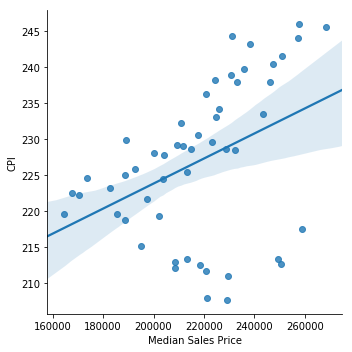

In [27]:
sns.lmplot(x="Median Sales Price", y="CPI", data=dfquarterly08);
plt.savefig('images\MSPvsCPI_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


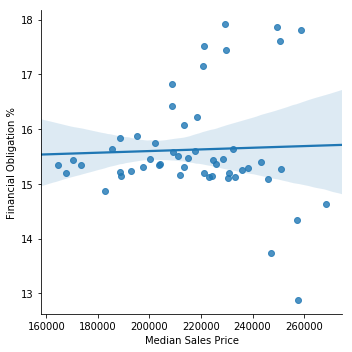

In [28]:
sns.lmplot(x="Median Sales Price", y="Financial Obligation %", data=dfquarterly08);
plt.savefig('images\MSPvsFinancialObligation%_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


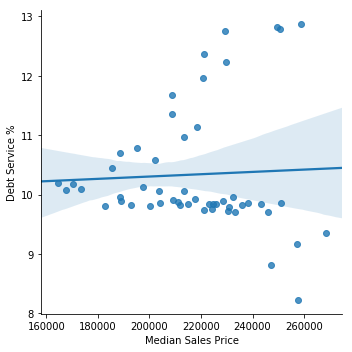

In [29]:
sns.lmplot(x="Median Sales Price", y="Debt Service %", data=dfquarterly08);
plt.savefig('images\MSPvsDebtService%_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


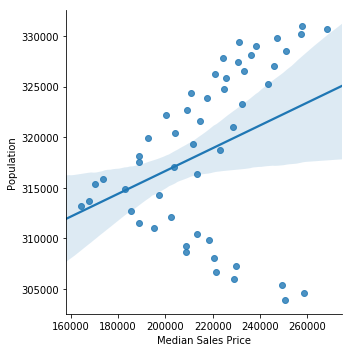

In [30]:
sns.lmplot(x="Median Sales Price", y="Population", data=dfquarterly08);
plt.savefig('images\MSPvsPopulation_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


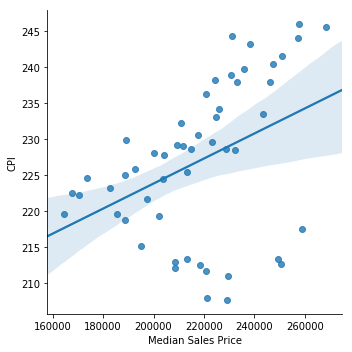

In [31]:
sns.lmplot(x="Median Sales Price", y="CPI", data=dfquarterly08);
plt.savefig('images\MSPvsCPI_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


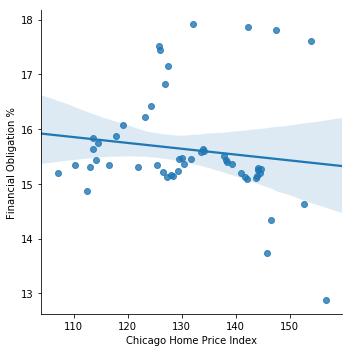

In [32]:
sns.lmplot(x="Chicago Home Price Index", y="Financial Obligation %", data=dfquarterly08);
plt.savefig('images\CHPIvsFinancialObligation%_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


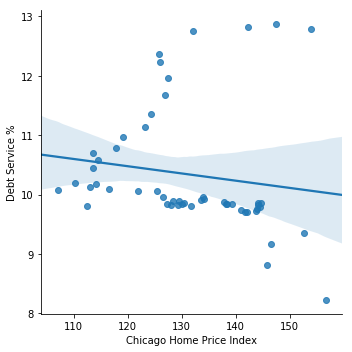

In [33]:
sns.lmplot(x="Chicago Home Price Index", y="Debt Service %", data=dfquarterly08);
plt.savefig('images\CHPIvsDebtService%_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


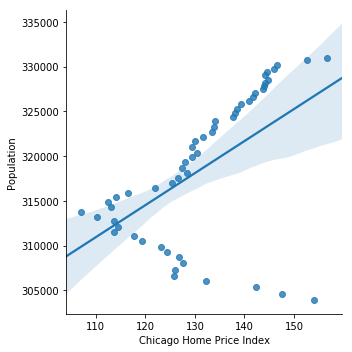

In [34]:
sns.lmplot(x="Chicago Home Price Index", y="Population", data=dfquarterly08);
plt.savefig('images\CHPIvsPopulation_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


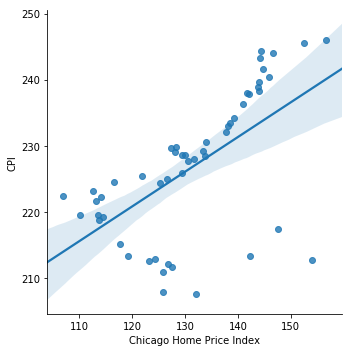

In [35]:
sns.lmplot(x="Chicago Home Price Index", y="CPI", data=dfquarterly08);
plt.savefig('images\CHPIvsCPI_quarterly.png')

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


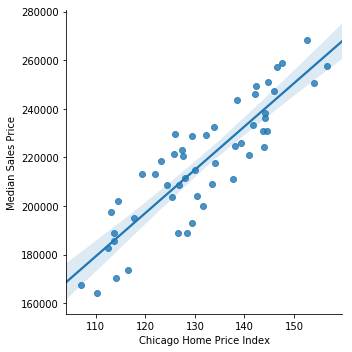

In [36]:
sns.lmplot(x="Chicago Home Price Index", y="Median Sales Price", data=dfquarterly08);
plt.savefig('images\CHPIvsMSP_.png')

In [37]:
def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

dfquarterly08.corr(method=histogram_intersection)

KeyError: <function histogram_intersection at 0x12e630f28>

In [38]:
dfquarterly08.corr(method='kendall')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.971308,0.000000,0.553544,0.734540,-0.601980,-0.488456,-0.487179,0.900452,1.000000,0.316107,-0.603318,-0.793363
Year,0.971308,1.000000,-0.066591,0.548933,0.729063,-0.592442,-0.479494,-0.480607,0.887454,0.971308,0.299813,-0.606388,-0.795836
Month,0.000000,-0.066591,1.000000,0.005174,0.003450,0.006069,-0.037238,-0.012074,0.022422,0.000000,0.173408,0.022422,0.020698
Chicago Home Price Index,0.553544,0.548933,0.005174,1.000000,0.803922,-0.473092,-0.449076,-0.092006,0.538462,0.553544,0.699359,-0.187029,-0.358974
National Home Price Index,0.734540,0.729063,0.003450,0.803922,1.000000,-0.626241,-0.561156,-0.273002,0.713424,0.734540,0.557526,-0.355958,-0.533937
National Unemployment Rate,-0.601980,-0.592442,0.006069,-0.473092,-0.626241,1.000000,0.870195,0.128887,-0.597431,-0.601980,-0.261664,0.248677,0.429119
Cook County Unemployment Rate,-0.488456,-0.479494,-0.037238,-0.449076,-0.561156,0.870195,1.000000,0.061341,-0.503601,-0.488456,-0.281820,0.190081,0.361230
Mortgage Interest Rate,-0.487179,-0.480607,-0.012074,-0.092006,-0.273002,0.128887,0.061341,1.000000,-0.405732,-0.487179,0.039985,0.401207,0.440422
CPI,0.900452,0.887454,0.022422,0.538462,0.713424,-0.597431,-0.503601,-0.405732,1.000000,0.900452,0.340249,-0.606335,-0.754148
Population,1.000000,0.971308,0.000000,0.553544,0.734540,-0.601980,-0.488456,-0.487179,0.900452,1.000000,0.316107,-0.603318,-0.793363


In [39]:
dfquarterly08.corr(method='pearson')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.997244,-0.014899,0.581501,0.901194,-0.478849,-0.391914,-0.685375,0.978456,0.997932,0.388333,-0.795348,-0.849330
Year,0.997244,1.000000,-0.089048,0.578981,0.898766,-0.476490,-0.386339,-0.683784,0.973307,0.995011,0.367560,-0.797248,-0.849595
Month,-0.014899,-0.089048,1.000000,0.003694,-0.014187,-0.006863,-0.054738,0.014223,0.018476,-0.012575,0.259717,0.067002,0.047783
Chicago Home Price Index,0.581501,0.578981,0.003694,1.000000,0.867477,-0.470121,-0.430458,0.005421,0.604284,0.547842,0.877204,-0.134520,-0.144950
National Home Price Index,0.901194,0.898766,-0.014187,0.867477,1.000000,-0.486859,-0.414887,-0.421054,0.900025,0.878519,0.702699,-0.553948,-0.579374
National Unemployment Rate,-0.478849,-0.476490,-0.006863,-0.470121,-0.486859,1.000000,0.968168,0.067487,-0.509712,-0.494330,-0.248178,0.129853,0.258241
Cook County Unemployment Rate,-0.391914,-0.386339,-0.054738,-0.430458,-0.414887,0.968168,1.000000,-0.044604,-0.416356,-0.407726,-0.236973,0.011291,0.144195
Mortgage Interest Rate,-0.685375,-0.683784,0.014223,0.005421,-0.421054,0.067487,-0.044604,1.000000,-0.629911,-0.696604,0.121720,0.826161,0.847548
CPI,0.978456,0.973307,0.018476,0.604284,0.900025,-0.509712,-0.416356,-0.629911,1.000000,0.971635,0.406166,-0.792356,-0.828241
Population,0.997932,0.995011,-0.012575,0.547842,0.878519,-0.494330,-0.407726,-0.696604,0.971635,1.000000,0.349326,-0.802172,-0.865270


In [40]:
dfquarterly08.corr(method='spearman')

,Unnamed: 0,Year,Month,Chicago Home Price Index,National Home Price Index,National Unemployment Rate,Cook County Unemployment Rate,Mortgage Interest Rate,CPI,Population,Median Sales Price,Financial Obligation %,Debt Service %
Unnamed: 0,1.000000,0.997350,-0.014899,0.608042,0.871425,-0.607170,-0.523131,-0.636558,0.977717,1.000000,0.407206,-0.764962,-0.912234
Year,0.997350,1.000000,-0.086183,0.608631,0.870359,-0.610174,-0.523045,-0.630631,0.972996,0.997350,0.390439,-0.762929,-0.910721
Month,-0.014899,-0.086183,1.000000,0.004584,-0.003438,0.012038,-0.045853,-0.016045,0.025213,-0.014899,0.235521,0.029798,0.033236
Chicago Home Price Index,0.608042,0.608631,0.004584,1.000000,0.896952,-0.582531,-0.558272,-0.115257,0.651669,0.608042,0.869053,-0.271920,-0.489029
National Home Price Index,0.871425,0.870359,-0.003438,0.896952,1.000000,-0.672887,-0.620866,-0.392470,0.877230,0.871425,0.722247,-0.544438,-0.762998
National Unemployment Rate,-0.607170,-0.610174,0.012038,-0.582531,-0.672887,1.000000,0.972131,0.174904,-0.652348,-0.607170,-0.368157,0.319491,0.513696
Cook County Unemployment Rate,-0.523131,-0.523045,-0.045853,-0.558272,-0.620866,0.972131,1.000000,0.094575,-0.572703,-0.523131,-0.373292,0.254435,0.442988
Mortgage Interest Rate,-0.636558,-0.630631,-0.016045,-0.115257,-0.392470,0.174904,0.094575,1.000000,-0.589345,-0.636558,0.046232,0.578161,0.603774
CPI,0.977717,0.972996,0.025213,0.651669,0.877230,-0.652348,-0.572703,-0.589345,1.000000,0.977717,0.442424,-0.788184,-0.899001
Population,1.000000,0.997350,-0.014899,0.608042,0.871425,-0.607170,-0.523131,-0.636558,0.977717,1.000000,0.407206,-0.764962,-0.912234


In [41]:
X = dfmonthly[["Mortgage Interest Rate", "CPI", "Population", "National Home Price Index"]]
y = dfmonthly["Chicago Home Price Index"].values.reshape(-1, 1)
print(X.shape, y.shape)

(376, 4) (376, 1)


In [42]:
X.iloc[375]

Mortgage Interest Rate            3.060
CPI                             251.491
Population                   331126.000
National Home Price Index       249.166
Name: 375, dtype: float64

In [43]:
y[5]

array([70.25085345])

In [44]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [45]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
model.fit(X_train_scaled, y_train_scaled)
training_score = model.score(X_train_scaled, y_train_scaled)
testing_score = model.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8607209483944989
Testing Score: 0.8607898242355048


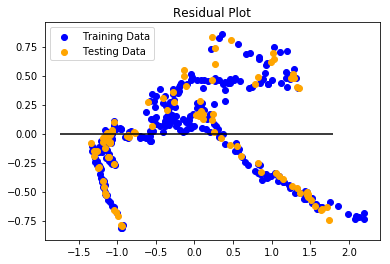

In [48]:
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), y_train_scaled - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test_scaled - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()


In [49]:
ypred = model.predict(X_test_scaled)
ypred = y_scaler.inverse_transform(ypred)
print(ypred)

[[124.46010124]
 [158.83756992]
 [107.91481004]
 [114.35309084]
 [110.6327756 ]
 [ 87.5002216 ]
 [101.37224141]
 [ 89.06727661]
 [ 87.00158664]
 [166.67034544]
 [125.62229506]
 [153.47609455]
 [ 83.63494693]
 [164.31636486]
 [127.70422756]
 [121.00671091]
 [147.46790289]
 [ 94.40959501]
 [146.67381798]
 [120.4076905 ]
 [ 86.04607554]
 [106.75813102]
 [102.62045127]
 [ 91.64991785]
 [ 84.96629389]
 [ 86.49833167]
 [ 85.05853863]
 [158.72525315]
 [ 89.61327785]
 [159.11141752]
 [118.66407856]
 [114.19395594]
 [ 87.55302164]
 [ 81.7296488 ]
 [141.02023702]
 [ 81.71410082]
 [ 82.71193969]
 [ 93.45292845]
 [ 88.82052532]
 [131.02984278]
 [119.45406877]
 [ 85.18128296]
 [155.88809063]
 [121.21635216]
 [ 86.18799787]
 [156.0459468 ]
 [ 83.13525266]
 [ 86.59236504]
 [ 86.94994529]
 [ 95.95139273]
 [141.05142657]
 [ 88.04097692]
 [159.24112212]
 [ 90.15721567]
 [124.79652753]
 [ 80.4836202 ]
 [120.01304808]
 [155.30301139]
 [160.31780533]
 [119.76274218]
 [124.35391239]
 [161.592823  ]
 [124.26

In [50]:
Intercept=model.intercept_
Coefficients=model.coef_
print(Coefficients)
print(Intercept)

[[ 0.16422045 -1.39857431  1.20212004  1.22993789]]
[-1.34696769e-15]


In [51]:
df123 = pd.DataFrame([3.3, 255, 331176, 255.36],["Mortgage Interest Rate", "CPI", "Population", "National Home Price Index"])
df321 = df123.transpose()
scaledinput=X_scaler.transform(df321)
s = model.predict(scaledinput)
prediction2022 = y_scaler.inverse_transform(s)
prediction2022

array([[180.60166573]])

In [52]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.16926182068175005, R2: 0.8607898242355048


In [53]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")



MSE: 0.16509682469792697, R2: 0.8642153446548827


In [54]:
df456 = pd.DataFrame([3.3, 255, 331176, 255.36],["Mortgage Interest Rate", "CPI", "Population", "National Home Price Index"])
df654 = df456.transpose()
scaledinput=X_scaler.transform(df654)
t = lasso.predict(scaledinput)
prediction2022t = y_scaler.inverse_transform(t)
prediction2022t

array([188.41065205])

In [55]:
Intercept2=lasso.intercept_
Coefficients2=lasso.coef_
print(Coefficients)
print(Intercept)

[[ 0.16422045 -1.39857431  1.20212004  1.22993789]]
[-1.34696769e-15]
